#SVM: Support Vector Machines




Support vector machines (SVMs), desenvolvido por (VAPNIK, 1995), representa um dos métodos de classificação e regressão mais poderosos. Isto é devido sua capacidade de processar grandes e altamente dimensionados conjuntos de dados (PRIYANKA; GUPTA, 2013, p. 105).

Para determinar o melhor separador, a SVM tenta resolver um problema de otimização com as seguintes condições:


1.  Aumentar a distância do separador até as classes (pontos)
2.  Maximizar o número de pontos corretamente classificados no training set.



In [ ]:
#@title Importando bibliotecas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

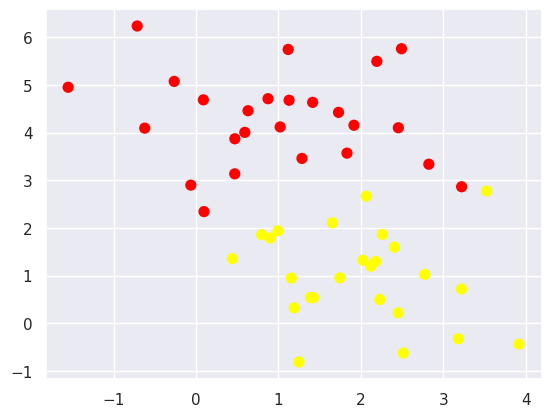

In [ ]:
#@title Gerando dados para exemplificar


from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.99)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

O classificador linear irá buscar um hiperplano (reta) ótimo capaz de separar as  classes. Visivelmente podemos ver a posição da reta. No entanto, podemos ter inúmeras retas que são capazes de classificar este conjunto de dados.


Hiperplano ótimo é aquele que possui a mesma
distância para os elementos de ambas as classes

*  1D – Ponto
*  2D – Reta
*  3D – Plano

São encontrados durante a fase de treinamento


Por exemplo:



In [ ]:
#@title Plotando os dados
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

#plt.xlim(-1, 3.5);

Mas qual é a melhor modelo de separação?



##SVM: definindo a margem

SVM objetiva maximizar a margem da função para encontrar o melhor ponto de  separação entre as classes.  A função que melhor maximiza a margem será usada no modelo de classificação.

Os Vetores de Suporte são os pontos tocados pelas linhas sombreadas. Fonte: (TICAY et al., 2012)


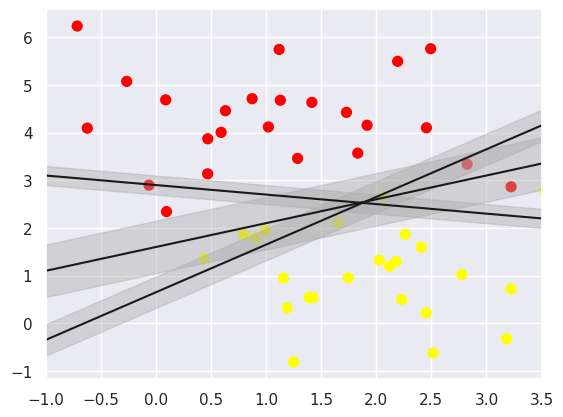

In [ ]:
#@title Código
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

A função escolhida pelo SVM é apresentada abaixo. As linhas tracejadas definem os vetores de suporte que auxiliam na definição da linha capaz de ampliar a margem do classificador.




In [ ]:
#@title Plot


def plot_svc_decision_function(c,X,y, ax=None, plot_support=True):

    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=N, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]


    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(1E10,X,y, ax)



def plot_model(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)





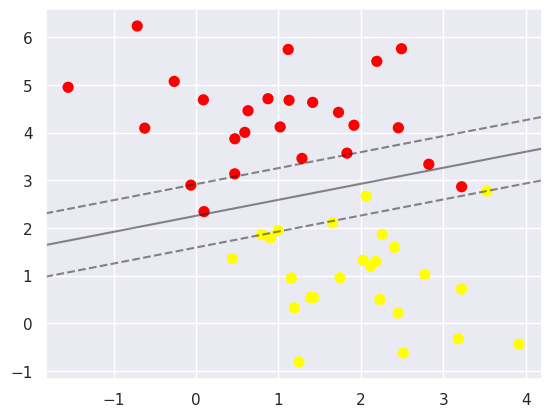

In [ ]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_model(clf, plot_support=False);


Exemplo de Hiperplano(linha contínua no centro) e Hiperplanos de Suporte(linhas tracejadas nas laterais)

Fonte: (SCHOLTEN et al., 2012)

Observe no gráfico abaixo que o SVM é insensível ao volume de informações.

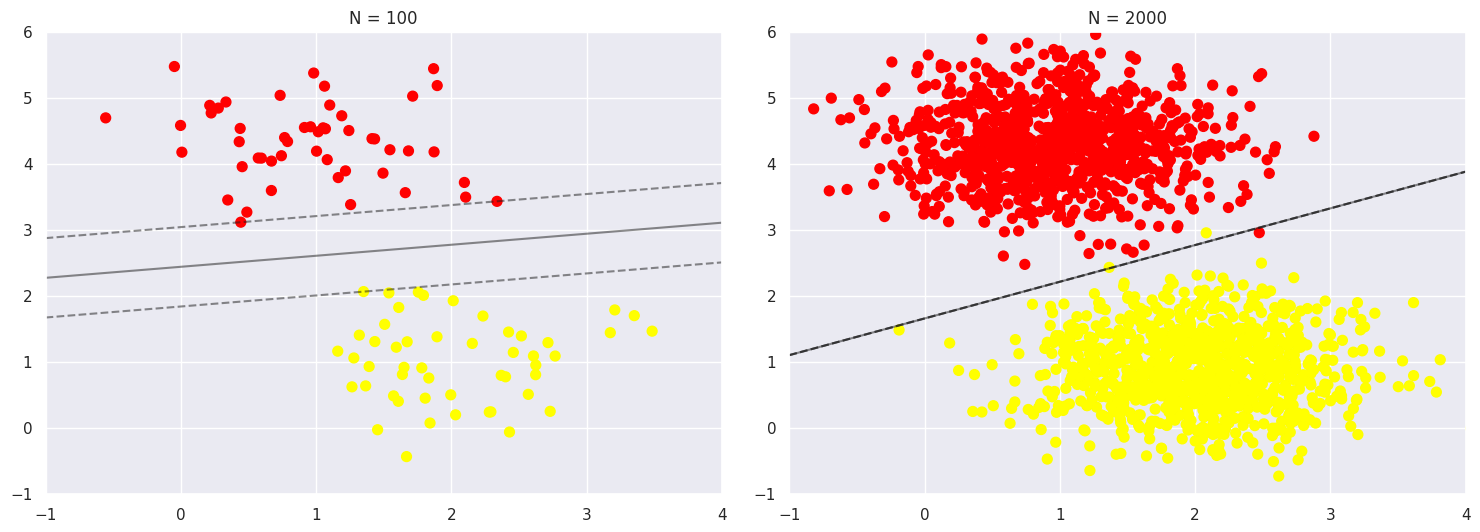

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [100,2000]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### SVM na prática

O hiperparametro ``C`` representa o fator de penalização que define qual o tamanho da margem que o modelo deve seguir. Se C é pequeno, a penalização é baixa para erros. Dessa forma, a margem pode ser grande, ou seja, com um grande número de erros.


Plotando o modelo:




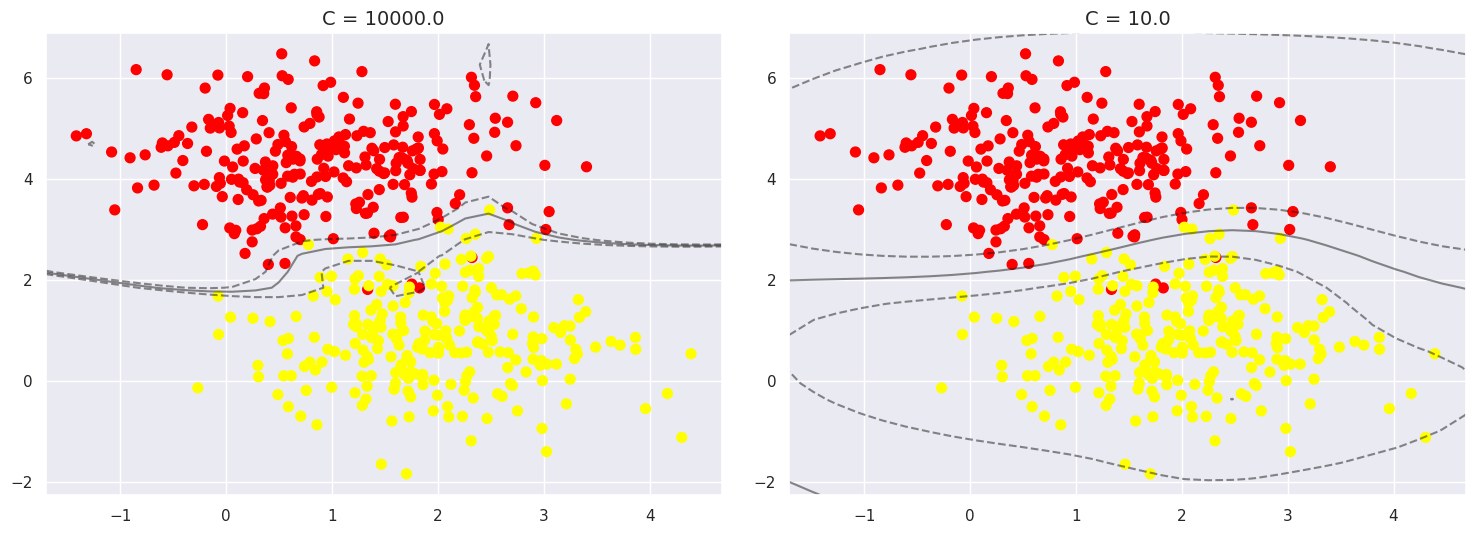

In [ ]:
#@title Hiper-parâmetro C
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.90)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10000.0, 10]):
    model = SVC(C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_model(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)



### Atividade


1- Use o database abaixo para calcular a precisão e a revocação do classificador SVC usando os parâmetro `C` de [100,1,0.00001]. Qual é o melhor valor do C segundo o Recall?

In [ ]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn import metrics


X, y = make_moons(n_samples=1000, noise=0.99)
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3)


### Kernel SVM

O SVM se torna bastante poderoso quando combinado a *Kernels*. A partir de kernel radial (`rbf`), por exemplo, é possível gerar funções não-lineares para separação das classes. Em outras palavras, é responsável por elevar a dimensão dos dados para que sejam possíveis de serem separados mais precisamente  por um hiperplano.

Por exemplo:




![](https://github.com/dbguilherme/machinelearning/blob/main/pictures/svm_kernel.png?raw=true)

###Exemplo:

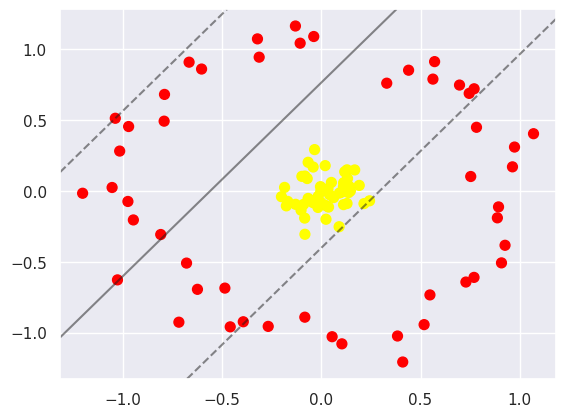

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_model(clf, plot_support=False);



**Claramente** funções lineares não são uma boa escolha para este padrão de dados. Usando uma função *radial* **(rbf)** mudamos o padrão de classificação:


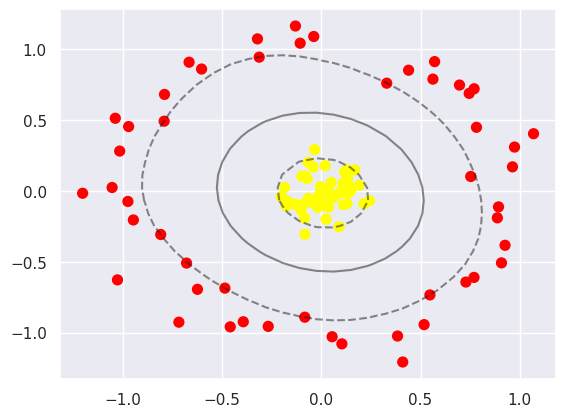

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_model(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: gamma

Funções não-lineares (rbf) podem melhorar bastante a eficiência do modelo de acordo com o padrão de dados. Mas e se os dados estiverem em sobreposição ou misturados?

O *Gamma* controla distâncias dos pontos para a criação do modelo. Baixos valores de gamma representam uma alta tolerância, indicando que pontos não precisam estar tão próximos para pertencer no mesmo grupo. Para grandes valores de gamma, baixa tolerância, os pontos precisam estar muito próximos para serem inseridos no mesmo grupo.





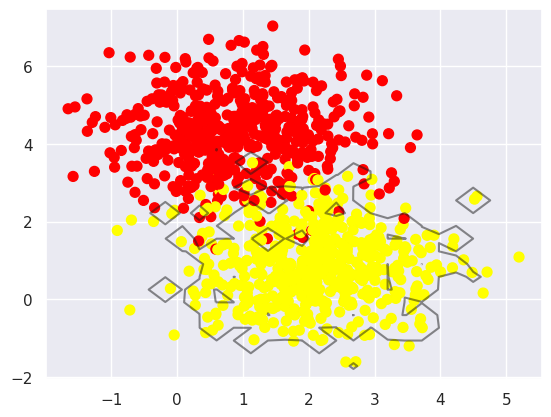

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=0.99)


clf = SVC(kernel='rbf', gamma=500)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_model(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');



###Atividade: teste com valores de gamma menores (10, 1,0.1,0.001). O que aconteceu?

> Adicionar aspas



###k-Fold Cross-Validation (CV)  


A validação cruzada é uma técnica de amostragem usada para avaliar modelos de predição.

O valor `k`define quantos grupos que os dados devem ser divididos.


<img src="https://github.com/dbguilherme/machinelearning/blob/main/pictures/kfold.png?raw=true"
     alt="Markdown Monster icon"
     style="float: center; margin-right: 1px;"
     width="500px" />

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['f1_weighted', 'f1_macro']
cv = cross_validate(SVC(), X, y, scoring=scoring,cv=5,verbose=1)

df=pd.DataFrame(cv)
df


,fit_time,score_time,test_f1_weighted,test_f1_macro
0,0.007778,0.011091,0.954990,0.954990
1,0.008105,0.010535,0.960000,0.960000
2,0.007241,0.010809,0.959936,0.959936
3,0.009440,0.009752,0.964999,0.964999
4,0.009339,0.012787,0.949980,0.949980


###GridSearch:







O objetivo do GridSearch é fazer uma busca exaustiva pelos parâmetros em busca da melhor combinação.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,0.5,1],
              'kernel':['rbf','linear'],
              'gamma':[0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(), param_grid, cv=5,
                                  scoring="precision_macro",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}


#Exemplo prático:



In [ ]:
#@title Load Classes
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
print(X)
y = iris.target
iris.feature_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=17)

#criando o objeto svc
svc = SVC()
#treinando o classificador
svc.fit(X_train, y_train)
print("parametros C:",svc.get_params()['C'])
print("parametros kernel:",svc.get_params()['kernel'])
print("parametros Gamma:",svc.get_params()['gamma']) #1 / (n_features * X.var())

#fazendo a predição
y_pred = svc.predict(X_test)

#plotando
print("confusion matrix \n", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(svc, X_test, y_test)


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
from sklearn.metrics import classification_report
#reportando as métricas
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 1,0.5, 0.1],'kernel':['rbf','linear'],'gamma':[0.001,0.0001]}

model=SVC()

grid = GridSearchCV(model, param_grid, cv=5,
                                  scoring="f1_macro",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

grid.fit(X_train, y_train)


df = pd.DataFrame(grid.cv_results_)


In [ ]:
df[['param_C',"param_gamma",'param_kernel','mean_train_score','mean_test_score']]

In [ ]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
grid.best_estimator_

In [ ]:
from sklearn.metrics import classification_report
#reportando as métricas
print(classification_report(y_test, y_pred))
print("confusion matrix \n", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)


### Outro exemplo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/paulafortuna/Portuguese-Hate-Speech-Dataset/master/2019-05-28_portuguese_hate_speech_binary_classification.csv'
df= pd.read_csv(url)
df = df[['text', 'hatespeech_comb']]
print(df.head )


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y=df['hatespeech_comb']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(X_train.shape)

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.get_params()['C']

In [ ]:

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test)
print("confusion matrix \n", metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10,50],'kernel':['rbf','linear'],'gamma':[0.01,0.1]}


#mais de uma hora de execução
# grid = GridSearchCV(model, param_grid, cv=5,
#                                   scoring="precision_macro",
#                                   return_train_score=True,
#                                   verbose=True,
#                                   n_jobs=-1)

# grid.fit(X_train, y_train)

# print(grid.best_params_)

#C
model=SVC(C=10, kernel='linear').fit(X_train, y_train)

In [ ]:
#model = grid.best_estimator_
y_pred = model.predict(X_test)

In [ ]:
from sklearn.svm import SVC

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))
print("F1", metrics.f1_score(y_test, y_pred,average="macro"))
print("confusion matrix \n", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)

*Material utilizado do Python Data Science Handbook by Jake VanderPlas

#Atividade para ser entregue.

1- No dataset a seguir, rode o SVM e o Random Forest. Encontre os melhores parâmetros usando o GridSearch. Use o Cross Validation fazer o split do dataset.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'
df= pd.read_csv(url)

df = df[['tweet', 'class']]

df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(X_train.shape)
print(y)

2- Rode o grid search para encontrar a melhor combinação do  `gamma`  sabendo que o kernel RBF se ajusta bem com o valor de `C` igual à 10.

3- Compare com o método Random Forest. Qual teve o melhor F1 (se teve algum)?